#### Task2: Annotate 6 to 7 images (you can use attached cat_dog.zip for this and annotate cats and dogs using rectangles) using via annotator (find on internet or use the provided one in attachments), save the project, it will save all the annotations to a json file. Now your task is to create a notebook which load data from that json, load the information of bounding boxes along with label names and display / draw those on their respective images.

In [49]:
import json
import cv2
import matplotlib.pyplot as plt
import imutils
import os
import random
from skimage.util import random_noise
import numpy as np

In [4]:
with open('./cat_dog/cat_dog_annotations.json') as json_file:
    data = json.load(json_file)

data

{'_via_settings': {'ui': {'annotation_editor_height': 25,
   'annotation_editor_fontsize': 0.8,
   'leftsidebar_width': 18,
   'image_grid': {'img_height': 80,
    'rshape_fill': 'none',
    'rshape_fill_opacity': 0.3,
    'rshape_stroke': 'yellow',
    'rshape_stroke_width': 2,
    'show_region_shape': True,
    'show_image_policy': 'all'},
   'image': {'region_label': 'class',
    'region_color': '__via_default_region_color__',
    'region_label_font': '10px Sans',
    'on_image_annotation_editor_placement': 'NEAR_REGION'}},
  'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''},
  'project': {'name': 'via_project_18Oct2022_11h49m'}},
 '_via_img_metadata': {'1.jpeg45602': {'filename': '1.jpeg',
   'size': 45602,
   'regions': [{'shape_attributes': {'name': 'rect',
      'x': 284,
      'y': 27,
      'width': 365,
      'height': 478},
     'region_attributes': {'class': {'dog': True}}}],
   'file_attributes': {}},
  '2.jpeg4669': {'filename': '2.jpeg',
   'size': 4669

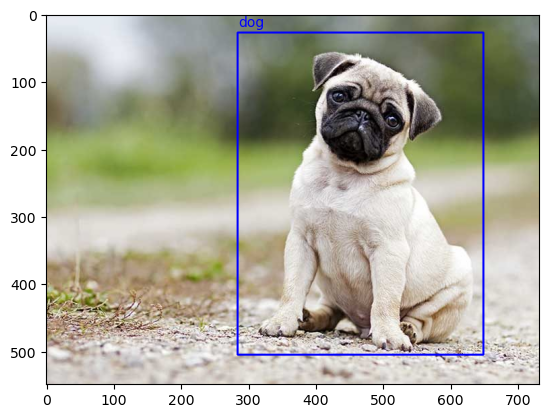

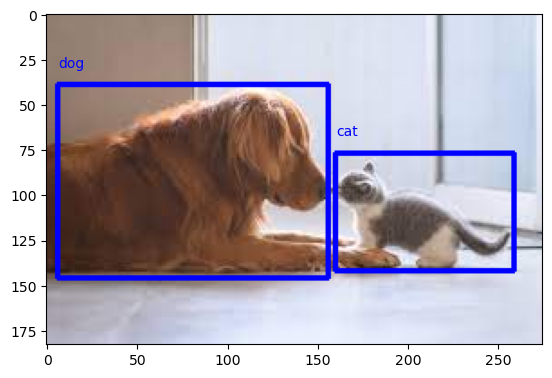

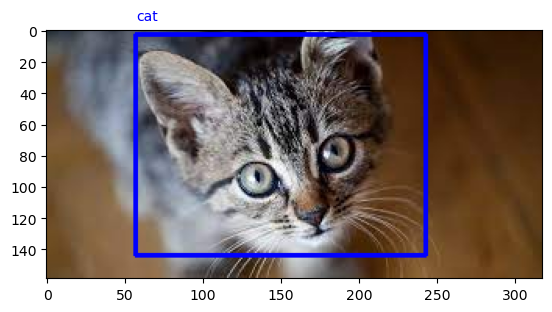

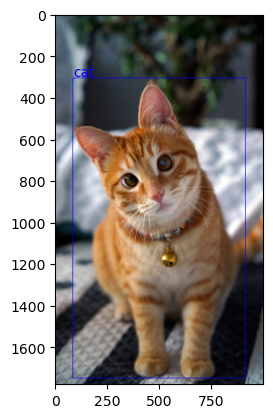

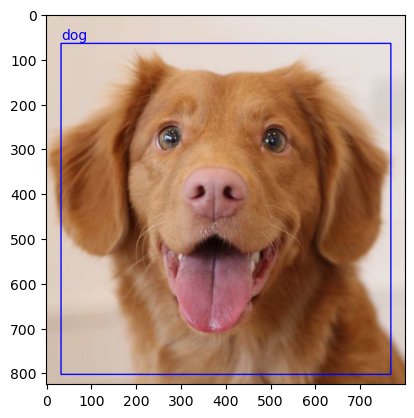

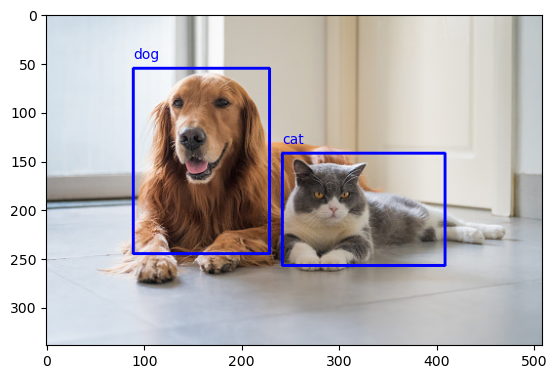

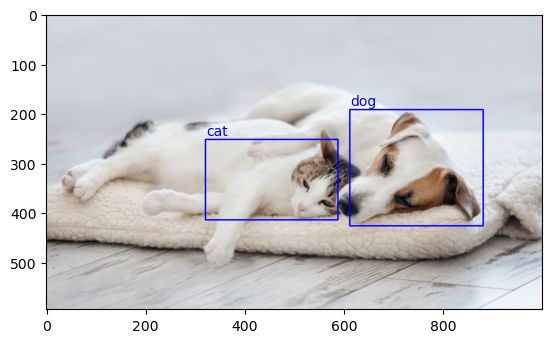

In [24]:
for keys, values in data['_via_img_metadata'].items():
    # print(keys)
    # print(values)
    
    img_name = values['filename']
    img = cv2.imread(f'./cat_dog/{img_name}')
    
    for region in values['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']
        
        region_attributes = region['region_attributes']
        animal_class = next(iter(region_attributes['class']))
    
        cv2.rectangle(img, (x, y), (x + width, y + height), (255, 0, 0), 2)
        plt.text( x, y-10,animal_class, color = 'b')

        imge = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
        
    plt.imshow(imge)
    plt.show()

### Task3: Augment the images provided in cat_dog.zip for rotation

In [34]:
with open('./cat_dog/cat_dog_annotations.json') as json_file:
    data = json.load(json_file)

data

{'_via_settings': {'ui': {'annotation_editor_height': 25,
   'annotation_editor_fontsize': 0.8,
   'leftsidebar_width': 18,
   'image_grid': {'img_height': 80,
    'rshape_fill': 'none',
    'rshape_fill_opacity': 0.3,
    'rshape_stroke': 'yellow',
    'rshape_stroke_width': 2,
    'show_region_shape': True,
    'show_image_policy': 'all'},
   'image': {'region_label': 'class',
    'region_color': '__via_default_region_color__',
    'region_label_font': '10px Sans',
    'on_image_annotation_editor_placement': 'NEAR_REGION'}},
  'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''},
  'project': {'name': 'via_project_18Oct2022_11h49m'}},
 '_via_img_metadata': {'1.jpeg45602': {'filename': '1.jpeg',
   'size': 45602,
   'regions': [{'shape_attributes': {'name': 'rect',
      'x': 284,
      'y': 27,
      'width': 365,
      'height': 478},
     'region_attributes': {'class': {'dog': True}}}],
   'file_attributes': {}},
  '2.jpeg4669': {'filename': '2.jpeg',
   'size': 4669

In [45]:
for keys, values in data['_via_img_metadata'].items():
    img_name = values['filename']
    img = cv2.imread(f'./cat_dog/{img_name}')
    
    for angle in range(0, 360, 5):
        rotated_img = imutils.rotate_bound(img, angle)
        
        img_name = img_name.split('.')[0]
        
        if not os.path.exists('rotation_results'):
            os.makedirs('rotation_results')
            
        cv2.imwrite(f'rotation_results/{img_name}_{angle}degree.jpeg', rotated_img)
        

### For Birghtness

In [46]:
for keys, values in data['_via_img_metadata'].items():
    img_name = values['filename']
    img = cv2.imread(f'./cat_dog/{img_name}')
    
    for item in range(5):
        brightness = random.randint(10, 15)/ 10
        bright_img = cv2.convertScaleAbs(img, alpha=brightness, beta=0)
        
        if not os.path.exists('brightness_results'):
            os.makedirs('brightness_results')
        
        img_name = img_name.split('.')[0]   
         
        cv2.imwrite(f'brightness_results/{img_name}_{item+1}.jpeg', bright_img)

### For Noise

In [52]:
for keys, values in data['_via_img_metadata'].items():
    img_name = values['filename']
    the_img = cv2.imread(f'./cat_dog/{img_name}')
    
    for item in range(5):
        noise_img = random_noise(the_img, mode='s&p', amount=0.4)
        noise_img = np.array(255*noise_img, dtype = 'uint8')
        
        if not os.path.exists('noise_results'):
            os.makedirs('noise_results')
        
        img_name = img_name.split('.')[0]   
         
        cv2.imwrite(f'noise_results/{img_name}_{item+1}.jpeg', noise_img)